In [1]:
pip install scikit-surprise

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 772.0/772.0 kB 9.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for scikit-surprise: filename=scikit_surprise-1.1.3-cp310-cp310-linux_x86_64.whl size=3163757 sha256=3526fc776e66b8ba0bbc665cb5bad461c77be402276673196025d5d5da28182e
  Stored in directory: /root/.cache/pip/wheels/a5/ca/a8/4e28def53797fdc4363ca4af740db15a9c2f1595ebc51fb445
Successfully built scikit-surprise


In [46]:
import numpy as np
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import linear_kernel
from surprise import Reader, Dataset, SVD, accuracy
from surprise import KNNBasic
from surprise.model_selection import train_test_split
from surprise.model_selection import KFold
from surprise.model_selection.validation import cross_validate
import matplotlib.pyplot as plt
import copy
from datetime import datetime


print("Import Success")

Import Success


### Load Dataset

In [3]:
meta = pd.read_csv('Dataset/movies_metadata.csv')
meta.head()

<ipython-input-3-4e61a1b4e090>:1: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  meta = pd.read_csv('Dataset/movies_metadata.csv')


,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",...,1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0
1,False,NaN,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",NaN,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,...,1995-12-15,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0
2,False,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",NaN,15602,tt0113228,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,...,1995-12-22,0.0,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,False,6.5,92.0
3,False,NaN,16000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,31357,tt0114885,en,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",...,1995-12-22,81452156.0,127.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Friends are the people who let you be yourself...,Waiting to Exhale,False,6.1,34.0
4,False,"{'id': 96871, 'name': 'Father of the Bride Col...",0,"[{'id': 35, 'name': 'Comedy'}]",NaN,11862,tt0113041,en,Father of the Bride Part II,Just when George Banks has recovered from his ...,...,1995-02-10,76578911.0,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Just When His World Is Back To Normal... He's ...,Father of the Bride Part II,False,5.7,173.0


In [37]:
print(meta.shape)
meta.info()

(9099, 25)
<class 'pandas.core.frame.DataFrame'>
Int64Index: 9099 entries, 0 to 9098
Data columns (total 25 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   adult                  9099 non-null   object 
 1   belongs_to_collection  1674 non-null   object 
 2   budget                 9099 non-null   object 
 3   genres                 9099 non-null   object 
 4   homepage               1974 non-null   object 
 5   tmdbId                 9099 non-null   int64  
 6   original_language      9099 non-null   object 
 7   original_title         9099 non-null   object 
 8   overview               9099 non-null   object 
 9   popularity             9099 non-null   object 
 10  poster_path            9096 non-null   object 
 11  production_companies   9099 non-null   object 
 12  production_countries   9099 non-null   object 
 13  release_date           9099 non-null   object 
 14  revenue                9099 non-null   float6

In [4]:
# Rating
ratings = pd.read_csv('Dataset/ratings_small.csv')
ratings.head()

,userId,movieId,rating,timestamp
0,1,31,2.5,1260759144
1,1,1029,3.0,1260759179
2,1,1061,3.0,1260759182
3,1,1129,2.0,1260759185
4,1,1172,4.0,1260759205


In [38]:
print(ratings.shape)
ratings.info()

(100004, 4)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100004 entries, 0 to 100003
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   userId     100004 non-null  int64  
 1   movieId    100004 non-null  int64  
 2   rating     100004 non-null  float64
 3   timestamp  100004 non-null  int64  
dtypes: float64(1), int64(3)
memory usage: 3.1 MB


In [5]:
#Links of IMDb and TMDb
links = pd.read_csv('Dataset/links_small.csv')
links.head()

,movieId,imdbId,tmdbId
0,1,114709,862.0
1,2,113497,8844.0
2,3,113228,15602.0
3,4,114885,31357.0
4,5,113041,11862.0


In [39]:
print(links.shape)
links.info()

(9125, 3)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9125 entries, 0 to 9124
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype
---  ------   --------------  -----
 0   movieId  9125 non-null   int64
 1   imdbId   9125 non-null   int64
 2   tmdbId   9125 non-null   int64
dtypes: int64(3)
memory usage: 214.0 KB


### Processing

In [7]:
# Content based Recommender System

meta['overview'] = meta['overview'].fillna('')
meta['overview'].head()

0    Led by Woody, Andy's toys live happily in his ...
1    When siblings Judy and Peter discover an encha...
2    A family wedding reignites the ancient feud be...
3    Cheated on, mistreated and stepped on, the wom...
4    Just when George Banks has recovered from his ...
Name: overview, dtype: object

In [8]:
pd.DataFrame({'feature':meta.dtypes.index, 'dtype':meta.dtypes.values})

,feature,dtype
0,adult,object
1,belongs_to_collection,object
2,budget,object
3,genres,object
4,homepage,object
5,id,object
6,imdb_id,object
7,original_language,object
8,original_title,object
9,overview,object


In [9]:
meta = meta.drop([19730, 29503, 35587]) # Remove these ids to solve ValueError: "Unable to parse string..."

meta['id'] = pd.to_numeric(meta['id'])

In [10]:
pd.DataFrame({'feature':links.dtypes.index, 'dtype':links.dtypes.values})

,feature,dtype
0,movieId,int64
1,imdbId,int64
2,tmdbId,float64


In [11]:
col=np.array(links['tmdbId'], np.int64)
links['tmdbId']=col

In [12]:
meta.rename(columns={'id':'tmdbId'}, inplace=True)
meta = pd.merge(meta,links,on='tmdbId')
meta.drop(['imdb_id'], axis=1, inplace=True)
meta.head()


,adult,belongs_to_collection,budget,genres,homepage,tmdbId,original_language,original_title,overview,popularity,...,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count,movieId,imdbId
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",21.946943,...,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0,1,114709
1,False,NaN,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",NaN,8844,en,Jumanji,When siblings Judy and Peter discover an encha...,17.015539,...,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0,2,113497
2,False,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",NaN,15602,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,11.7129,...,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,False,6.5,92.0,3,113228
3,False,NaN,16000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,31357,en,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",3.859495,...,127.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Friends are the people who let you be yourself...,Waiting to Exhale,False,6.1,34.0,4,114885
4,False,"{'id': 96871, 'name': 'Father of the Bride Col...",0,"[{'id': 35, 'name': 'Comedy'}]",NaN,11862,en,Father of the Bride Part II,Just when George Banks has recovered from his ...,8.387519,...,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Just When His World Is Back To Normal... He's ...,Father of the Bride Part II,False,5.7,173.0,5,113041


In [13]:
tfidf = TfidfVectorizer(stop_words='english')


# Constructing  matrix TF-IDF
tfidf_matrix = tfidf.fit_transform(meta['overview'])
print(tfidf_matrix)

  (0, 7412)	0.141507787265163
  (0, 1794)	0.15370339411238843
  (0, 15280)	0.10420404172972147
  (0, 9190)	0.10750876239907227
  (0, 8265)	0.13234048412479654
  (0, 19148)	0.10842427955012833
  (0, 23667)	0.14229083701747539
  (0, 4969)	0.13612335665186115
  (0, 20161)	0.141507787265163
  (0, 12111)	0.10750876239907227
  (0, 20066)	0.10320991837903991
  (0, 15872)	0.1187133886335473
  (0, 845)	0.15667250132893026
  (0, 23278)	0.1217416923404063
  (0, 15552)	0.1870965845283944
  (0, 3986)	0.4929065576903361
  (0, 3656)	0.11162265269920074
  (0, 2993)	0.1300067509070328
  (0, 22703)	0.12425973057952297
  (0, 11912)	0.13672480038014734
  (0, 15685)	0.09451598229001461
  (0, 27067)	0.16013859891233556
  (0, 1315)	0.42687251105242624
  (0, 29298)	0.44639614692681384
  (0, 15301)	0.11255322820301758
  :	:
  (9098, 2587)	0.14827417069966287
  (9098, 16598)	0.13410405320048852
  (9098, 6437)	0.12253557647483929
  (9098, 29561)	0.11806663669722166
  (9098, 10208)	0.1283696622283905
  (9098, 461

In [14]:
cosine_sim = linear_kernel(tfidf_matrix, tfidf_matrix)  # similarity matrix
indices = pd.Series(meta.index, index=meta['original_title']).drop_duplicates()

In [15]:
cosine_sim

array([[1.        , 0.01801424, 0.        , ..., 0.        , 0.        ,
        0.01172966],
       [0.01801424, 1.        , 0.04893243, ..., 0.        , 0.00617224,
        0.01162237],
       [0.        , 0.04893243, 1.        , ..., 0.        , 0.00772206,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 1.        , 0.        ,
        0.        ],
       [0.        , 0.00617224, 0.00772206, ..., 0.        , 1.        ,
        0.00489843],
       [0.01172966, 0.01162237, 0.        , ..., 0.        , 0.00489843,
        1.        ]])

In [16]:
def recommend(title, cosine_sim=cosine_sim):

    idx = indices[title]
    sim_scores = list(enumerate(cosine_sim[idx]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    sim_scores = sim_scores[1:16]
    movie_indices = [i[0] for i in sim_scores]
    for i in movie_indices:
        pop = meta.at[i,'vote_average']
        if pop<5 or pop>10:
            movie_indices.remove(i)

    return meta[['original_title','vote_average']].iloc[movie_indices]

In [17]:
recommend('Iron Man')

,original_title,vote_average
7516,Iron Man 2,6.6
8296,Iron Man 3,6.8
5670,Scarface,7.5
8766,Avengers: Age of Ultron,7.3
8100,Brake,5.3
4274,Saturday Night Fever,6.5
6063,Hostage,6.2
2322,The Dark Half,5.4
6152,Batman Begins,7.5
1650,Return from Witch Mountain,5.6


### Train model

In [18]:

reader = Reader()
df = Dataset.load_from_df(ratings[['userId', 'movieId', 'rating']], reader)
kf = KFold(n_splits=5)
kf.split(df)

<generator object KFold.split at 0x7fc191db5930>

In [19]:
# Chia dữ liệu thành tập huấn luyện và kiểm tra
trainset, testset = train_test_split(df, test_size=0.2)

In [20]:
### Model SVD
svd_model = SVD()
measure = cross_validate(svd_model, df, measures=['RMSE', 'MAE'], cv=5, verbose=True)


Evaluating RMSE, MAE of algorithm SVD on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.9016  0.8918  0.8971  0.8938  0.8980  0.8965  0.0034  
MAE (testset)     0.6971  0.6873  0.6887  0.6885  0.6931  0.6909  0.0036  
Fit time          1.48    1.45    1.64    2.23    1.61    1.68    0.28    
Test time         0.12    0.12    0.20    0.21    0.13    0.16    0.04    


In [21]:
# trainset = df.build_full_trainset()
svd_model.fit(trainset)

In [22]:
### Model KNN
# Tạo mô hình KNNBasic
knn_model = KNNBasic(learning_rate=0.05, loss='warp')

# Thực hiện cross-validation với mô hình mới
measure_knn = cross_validate(knn_model, df, measures=['RMSE', 'MAE'], cv=5, verbose=True)

Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Evaluating RMSE, MAE of algorithm KNNBasic on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.9621  0.9697  0.9655  0.9694  0.9730  0.9680  0.0038  
MAE (testset)     0.7393  0.7452  0.7413  0.7462  0.7485  0.7441  0.0034  
Fit time          0.11    0.14    0.14    0.14    0.19    0.14    0.02    
Test time         1.35    1.37    1.34    1.37    2.32    1.55    0.38    


In [23]:
# trainset = df.build_full_trainset()
knn_model.fit(trainset)

Computing the msd similarity matrix...
Done computing similarity matrix.


In [24]:
# Đánh giá mô hình trên tập test
svd_predictions = svd_model.test(testset)
knn_predictions = knn_model.test(testset)

# Tính RMSE của mỗi mô hình
print('\nRMSE của SVD và KNN')
svd_rmse = accuracy.rmse(svd_predictions)
# print('RMSE của SVD: ', svd_rmse)
knn_rmse = accuracy.rmse(knn_predictions)
# print('RMSE của KNN: ', knn_rmse)

# Tính RMSE của mỗi mô hình
print('\nMAE của SVD và KNN')
svd_mae = accuracy.mae(svd_predictions)
knn_mae = accuracy.mae(knn_predictions)



RMSE của SVD và KNN
RMSE: 0.8967
RMSE: 0.9690

MAE của SVD và KNN
MAE:  0.6916
MAE:  0.7466


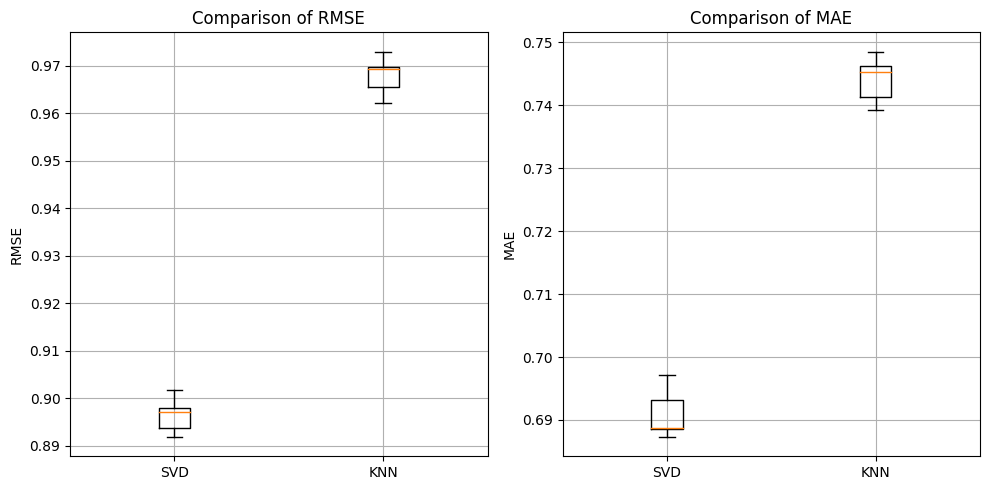

In [25]:
# Lấy kết quả RMSE và MAE của SVD
svd_rmse = measure['test_rmse']
svd_mae = measure['test_mae']

# Lấy kết quả RMSE và MAE của KNN
knn_rmse = measure_knn['test_rmse']
knn_mae = measure_knn['test_mae']

plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.boxplot([svd_rmse, knn_rmse], labels=['SVD', 'KNN'])
plt.title('Comparison of RMSE')
plt.ylabel('RMSE')
plt.grid(True)

plt.subplot(1, 2, 2)
plt.boxplot([svd_mae, knn_mae], labels=['SVD', 'KNN'])
plt.title('Comparison of MAE')
plt.ylabel('MAE')
plt.grid(True)

plt.tight_layout()
plt.show()

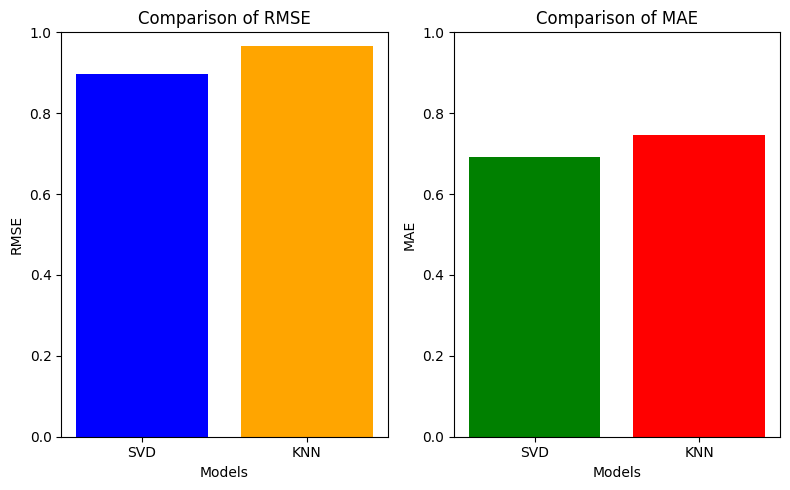

In [34]:
# Dữ liệu RMSE và MAE của hai mô hình
rmse_values = [0.8969, 0.9672]  # RMSE của SVD và KNN
mae_values = [0.6914, 0.7454]   # MAE của SVD và KNN

models = ['SVD', 'KNN']


plt.figure(figsize=(8, 5))

# Vẽ biểu đồ RMSE
plt.subplot(1, 2, 1)
plt.bar(models, rmse_values, color=['blue', 'orange'])
plt.xlabel('Models')
plt.ylabel('RMSE')
plt.title('Comparison of RMSE')
plt.ylim(0, 1)

# Vẽ biểu đồ MAE
plt.subplot(1, 2, 2)
plt.bar(models, mae_values, color=['green', 'red'])
plt.xlabel('Models')
plt.ylabel('MAE')
plt.title('Comparison of MAE')
plt.ylim(0, 1)

plt.tight_layout()
plt.show()

In [27]:
ratings[ratings['userId'] == 10]

,userId,movieId,rating,timestamp
744,10,50,5.0,942766420
745,10,152,4.0,942766793
746,10,318,4.0,942766515
747,10,344,3.0,942766603
748,10,345,4.0,942766603
749,10,592,3.0,942767328
750,10,735,4.0,942766974
751,10,1036,3.0,942767258
752,10,1089,3.0,942766420
753,10,1101,2.0,942767328


### Gợi ý phim cho người dùng

In [28]:
# smaller link file reload
links_df = pd.read_csv('Dataset/links_small.csv')
col=np.array(links_df['tmdbId'], np.int64)
links_df['tmdbId']=col

links_df = links_df.merge(meta[['title', 'tmdbId']], on='tmdbId').set_index('title')
links_index = links_df.set_index('tmdbId')
links_index

,movieId,imdbId
tmdbId,,
862,1,114709
8844,2,113497
15602,3,113228
31357,4,114885
11862,5,113041
...,...,...
159550,161944,255313
392572,162542,5165344
402672,162672,3859980


In [29]:
def hybrid(userId, title, model):
    idx = indices[title]
    tmdbId = links_df.loc[title]['tmdbId'] # Get the corresponding tmdb id

    sim_scores = list(enumerate(cosine_sim[idx]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    sim_scores = sim_scores[1:31] # Scores of 30 similar movies
    movie_indices = [i[0] for i in sim_scores]

    movies = meta.iloc[movie_indices][['title', 'vote_average', 'tmdbId']]
    movies['est'] = movies['tmdbId'].apply(lambda x: model.predict(userId, links_index.loc[x]['movieId']).est) # Estimated prediction using model
    movies = movies.sort_values('est', ascending=False) # Rank movies according to the predicted values
    movies.columns = ['Title', 'Vote Average', 'TMDb Id', 'Estimated Prediction']
    return movies.head(10) # Display top 10 recommended movies

In [40]:
# hybrid(30, 'The Conjuring', svd_model)

result = hybrid(10, 'Brake', svd_model)
print("data getting passed in contextual")
result

data getting passed in contextual


,Title,Vote Average,TMDb Id,Estimated Prediction
1677,The Dead Zone,6.9,11336,4.029606
6937,Iron Man,7.4,1726,3.935416
5437,The Immigrant,7.5,47653,3.933423
5491,Maria Full of Grace,6.9,436,3.929453
1050,Pink Floyd: The Wall,7.7,12104,3.891995
344,True Lies,6.8,36955,3.845134
5765,The Tall Blond Man with One Black Shoe,6.9,12089,3.802506
7880,Tinker Tailor Soldier Spy,6.6,49517,3.790770
1570,Soylent Green,6.8,12101,3.788219
6063,Hostage,6.2,2026,3.778051


In [41]:
result = hybrid(10, 'Brake', knn_model)
print("data getting passed in contextual")
result


data getting passed in contextual


,Title,Vote Average,TMDb Id,Estimated Prediction
5437,The Immigrant,7.5,47653,4.500000
5094,Vanishing Point,7.1,11951,4.500000
6937,Iron Man,7.4,1726,4.086315
5765,The Tall Blond Man with One Black Shoe,6.9,12089,4.000000
4941,"Salò, or the 120 Days of Sodom",6.4,5336,3.928571
2574,The Boys from Brazil,6.6,16241,3.881443
1677,The Dead Zone,6.9,11336,3.773095
8693,Stonehearst Asylum,6.6,207933,3.724138
1570,Soylent Green,6.8,12101,3.677277
5491,Maria Full of Grace,6.9,436,3.549006
